# Simulated annealing

Mediante esta técnica de búsqueda heurística intentaremos aproximarnos al mínimo de la siguiente función:

$$
f(x,y) = 0.2 + x^2 + y^2 - 0.1 \cdot \cos(6 \pi x) - 0.1 \cdot \cos(6 \pi y)
$$

<img src="imgs/function_min.jpg" width=70%>

Su mínimo se encuentra en el punto $(0,0)$.

iteration Number =  0   best_so_far =  [-0.88259713  2.09594807]   new_best = 5.45535
iteration Number =  1   best_so_far =  [-0.79605637  1.8657942 ]   new_best = 4.47309
iteration Number =  2   best_so_far =  [-0.62157519  1.78967351]   new_best = 3.79124
iteration Number =  3   best_so_far =  [-0.58967128  1.76473647]   new_best = 3.67745
iteration Number =  4   best_so_far =  [-0.44346049  1.5587224 ]   new_best = 2.91946
iteration Number =  6   best_so_far =  [-0.40270465  1.55761635]   new_best = 2.80898
iteration Number =  7   best_so_far =  [-0.34932356  1.54841902]   new_best = 2.68536
iteration Number =  10   best_so_far =  [0.02230315 1.56337538]   new_best = 2.59017
iteration Number =  11   best_so_far =  [0.01001413 1.46979843]   new_best = 2.34637
iteration Number =  63   best_so_far =  [0.376219   1.38292654]   new_best = 2.12549
iteration Number =  66   best_so_far =  [0.36257453 1.37102112]   new_best = 2.05010
iteration Number =  67   best_so_far =  [0.36431547 1.2588

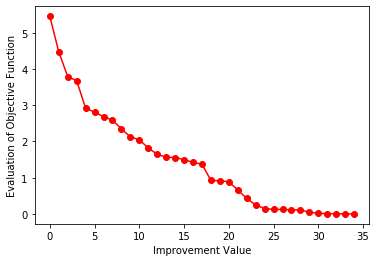

In [4]:
from numpy import asarray, exp
from numpy.random import randn, rand, seed
from matplotlib import pyplot
import math


# define objective function
def objective(step):
    x1 = step[0]
    x2 = step[1]
    obj = 0.2 + x1**2 + x2**2 - 0.1*math.cos(6.0*3.1415*x1) - 0.1*math.cos(6.0*3.1415*x2)
    return obj


# Define simulated annealing algorithm
def sa(objective, area, iterations, step_size, temperature):
    # create initial point
    start_point = area[:, 0] + rand( len( area ) ) * ( area[:, 1] - area[:, 0] )
    
    # evaluate initial point
    start_point_eval = objective(start_point)
    
    # Assign previous and new solution to previous and new_point_eval variable 
    mia_start_point, mia_start_eval = start_point, start_point_eval
    outputs = []
    
    for i in range(iterations):
        
        # First step by mia
        mia_step = mia_start_point + randn( len( area ) ) * step_size  
        mia_step_eval = objective(mia_step)
        
        if mia_step_eval < start_point_eval:
            start_point, start_point_eval = mia_step, mia_step_eval
            outputs.append(start_point_eval)  #Append the new values into the output list
            #print('Acceptance Criteria = %.5f' % mac," ",'iteration Number = ',i," ", 'best_so_far = ',start_point," " ,'new_best = %.5f' % start_point_eval)
            print('iteration Number = ',i," ", 'best_so_far = ',start_point," " ,'new_best = %.5f' % start_point_eval)
            
        difference = mia_step_eval - mia_start_eval
        t = temperature / float(i + 1)
        
        # calculate Metropolis Acceptance Criterion / Acceptance Probability
        mac = exp(-difference / t)
        
        # check whether the new point is acceptable 
        if difference < 0 or rand() < mac:
            mia_start_point, mia_start_eval = mia_step, mia_step_eval
            
    return [start_point, start_point_eval, outputs]

seed(1)

# define the area of the search space
# area = asarray([[-6.0, 6.0]])
area = asarray([[-5.0, 5.0],[-5.0, 5.0]])

# initial temperature
temperature = 12

# define the total no. of iterations
iterations = 1200

# define maximum step_size
step_size = 0.1

# perform the simulated annealing search
start_point, output, outputs = sa(objective, area, iterations, step_size, temperature)

#plotting the values
pyplot.plot(outputs, 'ro-')
pyplot.xlabel('Improvement Value')
pyplot.ylabel('Evaluation of Objective Function')
pyplot.show()